In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#Resizing image to 180*180 pixels, 32 Images for the batch

In [3]:
batch_size = 32
img_height = 180
img_width = 180

data_dir = 'D:\Desktop\weather forecast'

In [4]:
#Making the train validation split of 80 and 20 percentage

#Train Split

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1125 files belonging to 4 classes.
Using 900 files for training.


In [6]:
#Validation Split

In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 1125 files belonging to 4 classes.
Using 225 files for validation.


In [8]:
#Here are all the classes

In [9]:
class_names = train_ds.class_names
print(class_names)

['Cloudy', 'Rain', 'sunShine', 'sunrise']


In [10]:
#Normalizing the data by 255 pixels

In [11]:
normalization_layer = layers.Rescaling(1./255)

In [12]:
#Here the images values are from 0 to 1

In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [14]:
#Class Names

In [15]:
class_names

['Cloudy', 'Rain', 'sunShine', 'sunrise']

In [16]:
#First Model: Convolutional Model with Three layers, 16->32->64 filters

In [17]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
     

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [20]:

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
29/29 [==============================] - 21s 669ms/step - loss: 0.7245 - accuracy: 0.7200 - val_loss: 0.4828 - val_accuracy: 0.8489
Epoch 2/20
29/29 [==============================] - 16s 540ms/step - loss: 0.3732 - accuracy: 0.8711 - val_loss: 0.3972 - val_accuracy: 0.8667
Epoch 3/20
29/29 [==============================] - 16s 554ms/step - loss: 0.3267 - accuracy: 0.8756 - val_loss: 0.3847 - val_accuracy: 0.8622
Epoch 4/20
29/29 [==============================] - 18s 614ms/step - loss: 0.3407 - accuracy: 0.8689 - val_loss: 0.3164 - val_accuracy: 0.8978
Epoch 5/20
29/29 [==============================] - 22s 746ms/step - loss: 0.1749 - accuracy: 0.9367 - val_loss: 0.3308 - val_accuracy: 0.8711
Epoch 6/20
29/29 [==============================] - 21s 710ms/step - loss: 0.1712 - accuracy: 0.9389 - val_loss: 0.3551 - val_accuracy: 0.8756
Epoch 7/20
29/29 [==============================] - 22s 705ms/step - loss: 0.1671 - accuracy: 0.9322 - val_loss: 0.3616 - val_accuracy: 0.8978

In [21]:
print('Accuracy:', model.evaluate(val_ds)[1]*100)

8/8 [==============================] - 2s 113ms/step - loss: 0.4257 - accuracy: 0.8933
Accuracy: 89.33333158493042


In [22]:
model.evaluate(train_ds)

29/29 [==============================] - 5s 153ms/step - loss: 0.0104 - accuracy: 1.0000


[0.0104386480525136, 1.0]

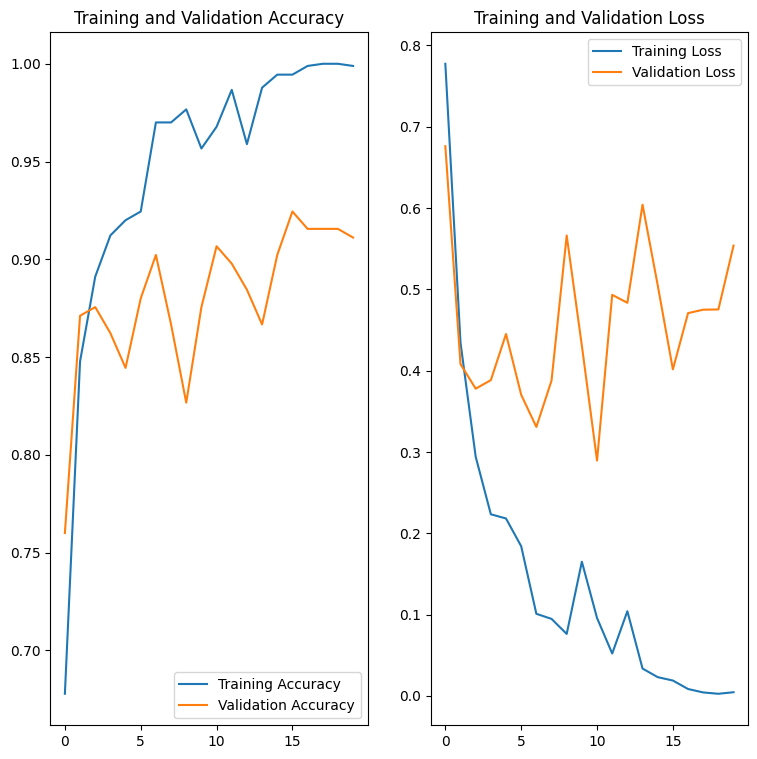

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
     

In [ ]:
#With Drop out layer

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
print('Accuracy:', model.evaluate(val_ds)[1]*100)

In [ ]:
model.evaluate(train_ds)